*05 Aug 2025, Julian Mak (whatever with copyright, do what you want with this)

### As part of material for OCES 5303 "AI and Machine Learning in Ocean Science" delivered at HKUST

For the latest version of the material, go to the public facing [GitHub](https://github.com/julianmak/OCES5303_ML_ocean) page.

---------------------------
# Some notes about the model data

The models below and their data can be generated on the fly, and are relevant to the ocean in some form (directly or in some fairly round about way). I am not going to tell you what they do; that's part of the investigation for you. These model either depend on choice of parameters, the initial condition, or both. The ones I've chosen below exemplify certain aspects of the system in question, but you should probably also investigate what different things can show up also (either by experimenting of do some background reading).

**Possible things to investigate and do with this data**:

* Provide a brief overview of what the model is, what it describes, and some observed behaviour of the model.
* What do the variables and parameters mean?
* How does the data/regime vary as you vary parameters?
* Make sure the graphs you use are labelled, has a background grid, adjust the fontsize so it is readable etc.
* Predict one variable from another or vice-versa, or from itself at a previous time say.
* Classify whether the model state is in one regime or another? You'll need to label the data accordingly though.

---

In [1]:
# some common packages used
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from scipy.integrate import odeint
from scipy.fftpack import diff as psdiff

from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 1) a ODE system example: Lorenz 63 system
#    model variables are x(t), y(t), z(t), with parameters sigma, beta, and rho

def lorenz63(t, state, sigma, rho, beta):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return [dx, dy, dz]

state0 = [1.0, 1.0, 1.0]  # Initial state
params = (10.0, 28.0, 8.0/3.0)  # sigma, rho, beta

t = np.linspace(0, 50, 5000)
sol = solve_ivp(lorenz63, [t[0], t[-1]], [0.1, 0.1, 0.1], t_eval=t, args=params)

x, y, z = sol.y

Text(0.5, 0, '$z(t)$')

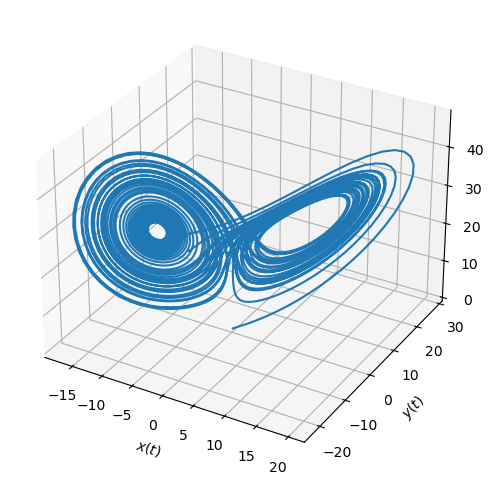

In [3]:
# phase portrait of the famous Lorenz butterfly diagram

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection="3d")
ax.plot(x, y, z)
ax.set_xlabel(r"$x(t)$")
ax.set_ylabel(r"$y(t)$")
ax.set_zlabel(r"$z(t)$")

Text(0.5, 0, '$t$')

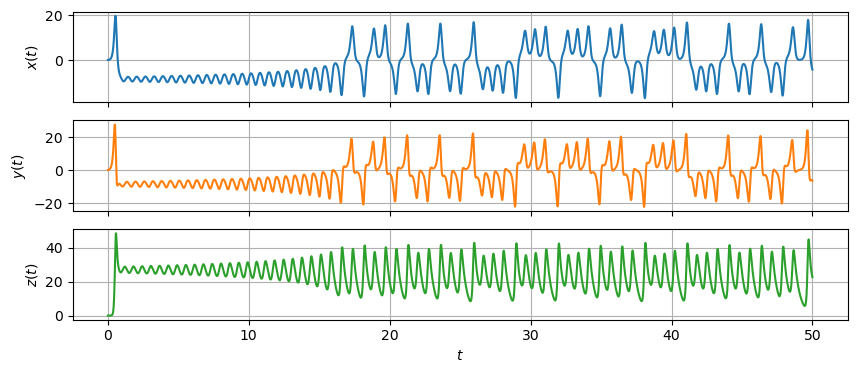

In [4]:
# individual variables as a time-series

fig = plt.figure(figsize=(10, 4))

ax = plt.subplot(3, 1, 1)
ax.plot(t, x, "C0")
ax.grid()
ax.set_ylabel(r"$x(t)$")
ax.set_xticklabels([])

ax = plt.subplot(3, 1, 2)
ax.plot(t, y, "C1")
ax.grid()
ax.set_ylabel(r"$y(t)$")
ax.set_xticklabels([])

ax = plt.subplot(3, 1, 3)
ax.plot(t, z, "C2")
ax.grid()
ax.set_ylabel(r"$z(t)$")
ax.set_xlabel(r"$t$")

In [5]:
# 2) a 1+1 PDE example: the KdV equation 
#    model variable here is u(x,t), you can think of it as wave height
#    parameters are c, which relates to the height (which affects the speed)

# initial conditions routine for a single soliton, 
#   but, generate two of these and add them together
# (the two solition solution is not what is described but it's good enough...)
def kdv_exact(x, c):
    u = 0.5*c*np.cosh(0.5*np.sqrt(c)*x)**(-2)
    return u

# define the subroutine for generating \partial u / \partial t
def kdv(u, t, L):
    ux = psdiff(u, period=L)
    uxxx = psdiff(u, period=L, order=3)
    return -6*u*ux - uxxx

# set the space and time grid
L = 50.0
N = 64
dx = L / (N - 1.0)
x = np.linspace(0, (1-1.0/N)*L, N)

# Set the time sample grid.
T = 200
t = np.linspace(0, T, 501)

# initial conditions with two solitons (caveat as above
u0 = kdv_exact(x-0.33*L, 0.75) + kdv_exact(x-0.65*L, 0.4)
sol = odeint(kdv, u0, t, args=(L,), mxstep=5000)

Text(0, 0.5, '$t$')

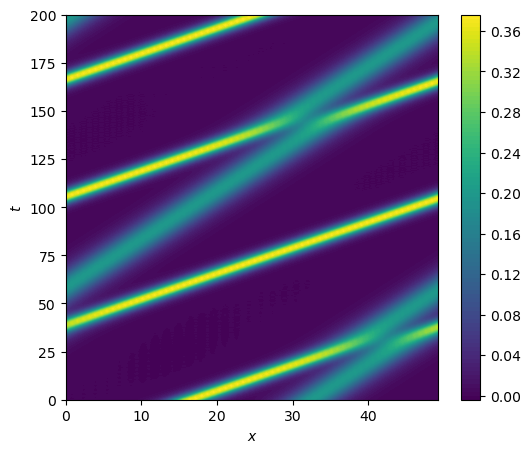

In [6]:
# Hovmoller plot (time going up; have a think about what this is showing)
fig = plt.figure(figsize=(6, 5))
ax = plt.axes()
cs = ax.contourf(x, t, sol, levels=101)
cax = plt.colorbar(cs)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$t$')

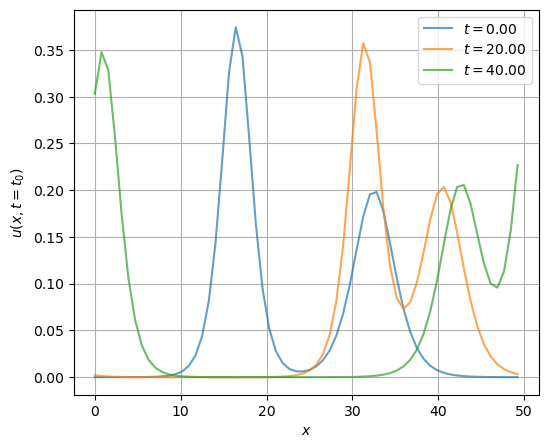

In [7]:
# snapshots in time (have a think about what this is showing)

Nt = len(t)
inds = [0, Nt // 10, Nt // 5]

fig = plt.figure(figsize=(6, 5))
ax = plt.axes()
for i in range(len(inds)):
    ax.plot(x, sol[inds[i], :], label=f"$t = {{{t[inds[i]]:.2f}}}$", alpha=0.7)
ax.legend()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u(x, t=t_0)$')
ax.grid()

In [8]:
# 3) Kuramoto-Sivashinsky equation
#    model variable here is u(x,t), you can think of it as amplitude of something
#    would suggest trying to vary L, in particular decreasing it here

# define the subroutine for generating \partial u / \partial t
def ks(u, t, L):
    ux = psdiff(u, period=L)
    uxx = psdiff(u, period=L, order=2)
    uxxxx = psdiff(u, period=L, order=4)
    return -uxx - uxxxx - u*ux

# set the space and time grid
L = 32*np.pi
N = 128
dx = L / (N - 1.0)
x = np.linspace(0, (1-1.0/N)*L, N)

# Set the time sample grid.
T = 200
t = np.linspace(0, T, 501)

# initial conditions (selection of cosines and sines will do)
u0 = np.cos(x/16)*(1+np.sin(x/16))
sol = odeint(ks, u0, t, args=(L,), mxstep=5000)

Text(0, 0.5, '$t$')

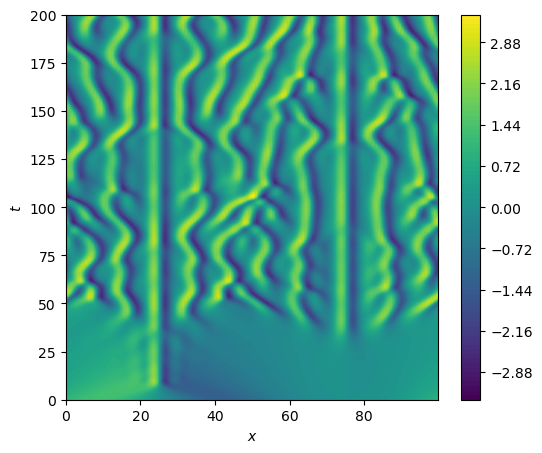

In [9]:
# Hovmoller plot (time going up; have a think about what this is showing)
fig = plt.figure(figsize=(6, 5))
ax = plt.axes()
cs = ax.contourf(x, t, sol, levels=101)
cax = plt.colorbar(cs)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$t$')

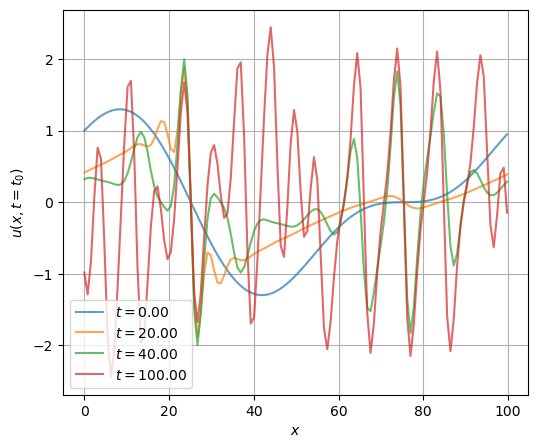

In [12]:
# snapshots in time (have a think about what this is showing)

Nt = len(t)
inds = [0, Nt // 10, Nt // 5, Nt // 2]

fig = plt.figure(figsize=(6, 5))
ax = plt.axes()
for i in range(len(inds)):
    ax.plot(x, sol[inds[i], :], label=f"$t = {{{t[inds[i]]:.2f}}}$", alpha=0.7)
ax.legend()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u(x, t=t_0)$')
ax.grid()

In [11]:
# There are other interesting ones, although these are more complicated
# (because you want u(x,y,t) for these). You could try:
#
# a) Cahn-Hilliard (condensation + phase separation in a whole load of systems)
# b) Swift-Hohenberg equation (cf. pattern formation in zoology problems)
# c) Rock-Paper-Scissors one (the ODEs or PDEs version of https://iopscience.iop.org/article/10.1088/1361-6544/aaf530)
#
# All of these I would suggest doing it pseudo-spectrally, you could ask me if you want,
# or could just look online (there are multiple implementations I can see with a quick
# google search).